In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [45]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

--2023-07-09 15:22:34--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-07-09 15:22:34--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf6076fa8332a492206a8731921.dl.dropboxusercontent.com/zip_download_get/Bi7ehaljh709H2eEVTqSFJxrdcIHrGXQyJEGRSQ02fnOlPPJ_6g1fPNS-YGwEg5AgNz8-0KdTU92KeqEgUKHj5zD6yh4xiDKp21EZON9a_wevw# [following]
--2023-07-09 15:22:35--  https://ucf6076fa8332a492206a8731921.dl.dropboxusercontent.com/zip_download_get/Bi7ehaljh709H2eEVTqSFJxrdcIHrGXQyJEGRSQ02fnOlPPJ_6g1fPNS-YGwEg5AgNz8-0KdTU92KeqEgUKHj5zD6yh4xi

In [ ]:
!unzip data -d "images/"

In [54]:
pip install keras_preprocessing

In [55]:
classes = os.listdir("images/Train")

In [56]:
for pokemon_type in classes:

  path = "images/Train/" + pokemon_type

  print(f"{pokemon_type} - {len(os.listdir(path))}")

Charmander - 102
Pikachu - 101
Bulbasaur - 101


In [57]:
from keras_preprocessing import image

In [58]:
train_data = []
train_labels = []

In [59]:
for category in classes:

  folder = f"images/Train/{category}"

  for image_name in os.listdir(folder):

    img_path = os.path.join(folder, image_name)




    img = image.load_img(img_path, target_size=(100, 100))

    img_array = image.img_to_array(img)

    train_data.append(img_array)

    train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [60]:
len(train_data)

304

In [61]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [62]:
train_data = train_data.reshape(len(train_data), 30000)

In [63]:
train_data.shape

(304, 30000)

In [64]:
category2label = {"Pikachu": 0, "Charmander": 1, "Bulbasaur": 2}
label2category = {0:"Pikachu", 1:"Charmander", 2:"Bulbasaur"}

In [65]:
train_labels = np.array([category2label[label] for label in train_labels])

In [66]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [67]:
from keras.layers import Dense
from keras import Sequential

In [68]:
features = train_data.shape[1]

In [69]:
model = Sequential()

In [70]:
model.add( Dense(units=512, activation='relu', input_shape=(features,)))

In [71]:
model.add( Dense(units=256, activation='relu' ) )
model.add( Dense(units=128, activation='relu' ) )
model.add( Dense(units=64, activation='relu' ) )
model.add( Dense(units=3, activation='softmax' ) )

In [72]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               15360512  
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50
10/10 [==============================] - 4s 292ms/step - loss: 2177.8171 - accuracy: 0.3224
Epoch 2/50
10/10 [==============================] - 2s 227ms/step - loss: 1676.2130 - accuracy: 0.3618
Epoch 3/50
10/10 [==============================] - 3s 297ms/step - loss: 1022.8909 - accuracy: 0.4836
Epoch 4/50
10/10 [==============================] - 3s 251ms/step - loss: 429.2876 - accuracy: 0.5592
Epoch 5/50
10/10 [==============================] - 3s 332ms/step - loss: 504.8211 - accuracy: 0.5954
Epoch 6/50
10/10 [==============================] - 2s 235ms/step - loss: 365.1860 - accuracy: 0.6053
Epoch 7/50
10/10 [==============================] - 2s 234ms/step - loss: 247.9508 - accuracy: 0.6809
Epoch 8/50
10/10 [==============================] - 2s 248ms/step - loss: 82.8437 - accuracy: 0.8059
Epoch 9/50
10/10 [==============================] - 3s 248ms/step - loss: 33.9230 - accuracy: 0.9112
Epoch 10/50
10/10 [==============================] - 3s 349ms/step - loss: 21.430

In [75]:
test_image = "/content/pikachu-gcca3e5191_1280.jpg"

In [76]:
img = image.load_img(test_image, target_size=(100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

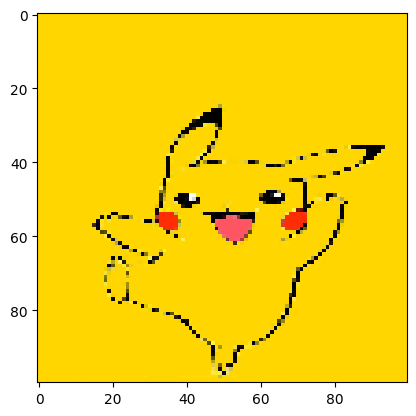

In [77]:
plt.imshow(img.astype('int'));

In [78]:
img = img.reshape(1, 30000)

In [79]:
model.predict(img).argmax()

1/1 [==============================] - 0s 108ms/step


0

In [80]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 36ms/step


'Pikachu'